# Charting a path into the data science field

This project attempts to shed light on the path or paths to becoming a data science professional in the United States.

Data science is a rapidly growing field, and the demand for data scientists is outpacing supply. In the past, most Data Scientist positions went to people with PhDs in Computer Science. I wanted to know if that is changing in light of both the increased job openings and the expanding definition of data science that has come with more companies realizing the wealth of raw data they have available for analysis, and how that can help to grow and refine their businesses.

## Business Questions


1. Do you need a a formal degree?
2. What programming language(s) do data science professionals need to know?
3. What, if any, are the preferred online learning platforms to gain data science knowledge and skills?
4. Does online learning platform preference differ based on job title and/or education level?

## Data

Since 2017, Kaggle ('The world's largest data science community') has annually surveyed its users on demographics, practices, and preferences. This notebook explores the data from Kaggle's 2020 Machine Learning and Data Science survey. A caveat: Kaggle is heavy on Machine Learning and competitions, and while it claims over 8 million users the group may not be representative of the overall data science community. Additionally,survey respondents are self-selected, so we can't extrapolate any findings to the data science community as a whole, but the trends and demographics amongst Kaggle survey takers may still offer insights about data science professionals.

The first step is importing the necessary libraries and data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
%matplotlib inline

from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Udacity DS blog post project/Kaggle2020/kaggle_survey_2020_responses.csv')
low_memory = False

### Initial data exploration and cleaning
Let's take a look at the survey data.

In [3]:
# Let's look at the first 5 rows of the dataset
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


One thing we can see from this: some questions comprise a single column, with a number of answers possible; these questions only allowed survey respondents to choose one answer from among the options. Other questions are spread through multiple columns, with each column tied to a specific answer; these were questions that allowed users to choose more than one option as the answer ('select all that apply'). The two types of questions will require different approaches to data preparation.

But first, we'll do some cleaning. The top row of data contains the question titles. We'll remove that, as well as the first column of survey completion time values.

In [4]:
# Removing the first column and the first row
df.drop(['Time from Start to Finish (seconds)'], axis=1, inplace=True)
df = df.loc[1:, :]
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(20036, 354)

There are over 20,000 responses, with 354 answer fields.

#### Data preparation and filtering

To improve readability of visualizations, we'll aggregate some fields, shorten some labels, and re-order categories.

In [6]:
# Aggregating the nonbinary answers
df.loc[(df.Q2 == 'Prefer not to say'), 'Q2'] = 'Other Response'
df.loc[(df.Q2 == 'Prefer to self-describe'),'Q2'] = 'Other Response'
df.loc[(df.Q2 == 'Nonbinary'), 'Q2'] = 'Other Response'

# Abbreviating country name
df.loc[(df.Q3 == 'United States of America'),'Q3']='USA'

# Shortening education level descriptions
df.loc[(df.Q4 == 'Doctoral degree'),'Q4']='PhD'
df.loc[(df.Q4 == 'Master’s degree'),'Q4']='Master’s'
df.loc[(df.Q4 == 'Bachelor’s degree'),'Q4']='Bachelor’s'
df.loc[(df.Q4 == "Some college/university study without earning a bachelor’s degree"), 'Q4']='Some college/university'
df.loc[(df.Q4 == 'No formal education past high school'), 'Q4']='High school'
df.loc[(df.Q4 == 'I prefer not to answer'), 'Q4']='Prefer not to answer'

# Ordering education levels by reverse typical chronological completion
q4_order = [
    'PhD',
    'Master’s', 
    'Professional degree', 
    'Bachelor’s', 
    'Some college/university', 
    'High school', 
    'Prefer not to answer']

# Putting coding experience answers in order from shortest time to longest
q6_order = [
    'I have never written code', 
    '< 1 years', 
    '1-2 years', 
    '3-5 years', 
    '5-10 years', 
    '10-20 years', 
    '20+ years']

df.loc[(df.Q37_Part_9 == 'Cloud-certification programs (direct from AWS, Azure, GCP, or similar)'), 'Q37_Part_9']='Cloud-certification programs'
df.loc[(df.Q37_Part_10 == 'University Courses (resulting in a university degree)'), 'Q37_Part_10']='University Courses resulting in a degree'

We're going to focus on the US answers from currently employed Kagglers.

In [7]:
# Filtering for just US responses
us_df = df[df['Q3'] == 'USA']

# Filtering to only include currently employed Kagglers
q5_order = [
    'Data Scientist',
    'Software Engineer',
    'Data Analyst', 
    'Research Scientist',
    'Product/Project Manager',
    'Business Analyst',
    'Machine Learning Engineer',
    'Data Engineer',
    'Statistician',
    'DBA/Database Engineer',
    'Other']

us_df = us_df[us_df['Q5'].isin(q5_order)]

We're interested in the demographic questions at the beginning, plus coding experience, coding languages used, and online learning platforms used. 

In [8]:
# Filtering to only include specific question columns
us_df = us_df.loc[:, ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5',
                      'Q7_Part_6', 'Q7_Part_7','Q7_Part_8','Q7_Part_9','Q7_Part_10','Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER',
                      'Q37_Part_1', 'Q37_Part_2', 'Q37_Part_3', 'Q37_Part_4', 'Q37_Part_5', 'Q37_Part_6', 'Q37_Part_7', 
                      'Q37_Part_8', 'Q37_Part_9', 'Q37_Part_10','Q37_Part_11', 'Q37_OTHER']]

In [9]:
us_df.isna().sum()

Q1                0
Q2                0
Q3                0
Q4                0
Q5                0
Q6               12
Q7_Part_1       390
Q7_Part_2      1131
Q7_Part_3       781
Q7_Part_4      1555
Q7_Part_5      1503
Q7_Part_6      1466
Q7_Part_7      1415
Q7_Part_8      1643
Q7_Part_9      1656
Q7_Part_10     1376
Q7_Part_11     1542
Q7_Part_12     1643
Q7_OTHER       1399
Q37_Part_1      906
Q37_Part_2     1352
Q37_Part_3     1247
Q37_Part_4     1313
Q37_Part_5     1536
Q37_Part_6     1426
Q37_Part_7     1287
Q37_Part_8     1471
Q37_Part_9     1565
Q37_Part_10    1266
Q37_Part_11    1526
Q37_OTHER      1541
dtype: int64

Not much in the way of missing values in the first 6 questions; that changes for the multiple-column questions, as expected, since users only filled in the column when they were choosing that particular option. We'll address that by converting the missing values to zeros in the helper functions.

In [10]:
us_df.shape

(1680, 31)

This will be the data for our analysis -- covering 1680 currently employed Kagglers in the US.

## Helper functions

A few functions to help with data visualizations. The first two plot a barchart with a corresponding list of the counts and percentages for the values; one handles single-column questions and the other handles multiple-column questions. The third and fourth are heatmap functions -- one for single-column questions, and one for multiple-column questions.

In [11]:
def list_and_bar(qnum, q_order, title):
    
    '''
    INPUT:
    qnum - the y-axis variable, a single-column question
    q_order - the order to display responses on the barchart
    title - the title of the barchart
    
    OUTPUT:
    1. A list of responses to the selected question, in descending order
    2. A horizontal barchart showing the values, in sorted order 
    '''

    # creating a dataframe of values to include both raw counts and percentages
    val_list = pd.DataFrame()
    val_list['Count'] = us_df[qnum].value_counts()
    pct = round(val_list * 100/us_df[qnum].count(),2)
    val_list['Pct'] = pct
    
    print(val_list)
    
    fig, ax = plt.subplots(1,1, figsize=(12,6))
    ax = us_df[qnum].value_counts()[q_order].plot(kind='barh')
    
    # reversing the order of y axis  -- 
    # the horizontal barchart displays values in the reverse order of a regular barchart (i.e., where the barchart might show 
    # a - b - c left to right, the corresponding horizontal barchart would show c at the top, and a at the bottom)
    ax.invert_yaxis()
    
    plt.title(title, fontsize = 14, fontweight = 'bold')
    plt.show()
    
    

def list_and_bar_mc(mc_df, title):
    
    '''
    INPUT:
    mc_df - a dataframe consisting of answers to a specific multiple-column question
    title - the title of the barchart
    
    OUTPUT:
    1. A list of responses to the selected question, in descending order
    2. A horizontal barchart showing the values, also in descending order
    '''
    print(mc_df)
    
    fig, ax = plt.subplots(1,1, figsize=(12,6))
    ax = mc_df['Count'].sort_values().plot(kind='barh')
    plt.title(title, fontsize = 14, fontweight = 'bold')
    plt.show()
    
    

def heatmap(qnum_a, qnum_b, title, order_rows, columns):
    
    '''
    INPUT:
    qnum_a - the x-axis variable, a single-column question
    qnum_b - the y-axis variable, a single-column question
    title - the title of the heatmap, describing the variables in the visualization
    order_rows - sorted order for the y-axis
    columns - sorted order for the x-axis
    
    OUTPUT:
    A heatmap showing the correlation between the two chosen variables
    '''
    vals = us_df[[qnum_a, qnum_b]].groupby(qnum_b)[qnum_a].value_counts().unstack()
    
    # getting the total number of responses for the columns in order to calculate the % of the total
    vals_rowsums = pd.DataFrame([vals.sum(axis=0).tolist()], columns=vals.columns, index=['All'])
    vals = pd.concat([vals_rowsums, vals], axis=0)

    # convert to % 
    vals = ((vals.T / (vals.sum(axis=1) + 0.001)).T) * 100 

    order = order_rows
    columns = columns
    
    vals = vals.reindex(order).reindex(columns = columns)
    
    fig, ax = plt.subplots(1,1, figsize=(12,6))
    ax = sns.heatmap(ax = ax, data = vals, cmap = 'GnBu', cbar_kws = {'format': '%.0f%%'})
    plt.title(title, fontsize = 14, fontweight = 'bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.show()
    
    

def heatmap_mc(qnum, qnum_mc, title, columns, order_rows):
    
    '''
    INPUT:
    qnum - the y-axis variable, a single-column question
    qnum_mc - the x-axis variable, a question with multiple columns of answers
    title - the title of the heatmap, describing the variables in the visualization
    order_rows - sorted order for the y-axis
    columns - a list of column names, representing the multiple-column answer options, ordered
    
    OUTPUT:
    1. A heatmap showing the correlation between the two specified variables
    2. avg_num - the average number of answer options chosen for the multiple column question
    '''
    # creating a dataframe with the single-column question
    df_qnum = us_df[qnum]
    df_qnum = pd.DataFrame(df_qnum)
    
    # creating a dataframe containing all the columns for a given multiple-column question
    cols_mc = [col for col in us_df if col.startswith(qnum_mc)]
    df_mc = us_df[cols_mc]
    df_mc.columns = columns
    
    # converting column values to binary 0 or 1 values (1 if the user chose that answer, 0 if not)
    df_mc = df_mc.notnull().astype(int)
    
    # joining the dataframes together
    df_join = df_qnum.join(df_mc)
    
    # aggregating counts for each answer option and re-ordering dataframe
    df_agg = df_join.groupby([qnum]).agg('sum')
    df_agg = df_agg.reindex(order_rows)
    
    df_agg['participants'] = df_join.groupby(qnum)[qnum].count()
    df_agg =  df_agg.div(df_agg.loc[:, 'participants'], axis=0)
    df_agg.drop(columns='participants', inplace=True)
    
    
    fig, ax = plt.subplots(1,1, figsize=(12,6))
    ax = sns.heatmap(ax = ax, data = df_agg, cmap = 'GnBu')
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.set_major_formatter(PercentFormatter(1, 0))
    plt.title(title, fontsize = 14, fontweight = 'bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.show() 
    
    # finding the average number of answers chosen for the multiple column options, minus tabulations for 'None'
    df_temp = df_join
    df_temp.drop('None', axis = 1, inplace = True)
    rowsums = df_temp.sum(axis = 1)
    avg_num = round(rowsums.mean(), 2)
    
    print('Average number of options chosen by survey respondents: ' + str(avg_num) + '.')


## Analysis and visualizations

We'll start by looking at the age and gender distribution, just to get an overview of the response community.

Text(0.5, 1.0, 'Age and Gender Distribution')

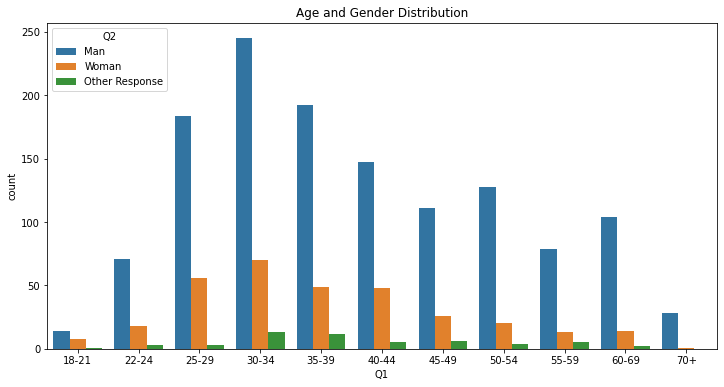

In [12]:
plt.figure(figsize=[12,6])
us_ages = us_df['Q1'].value_counts().sort_index()
sns.countplot(data = us_df, x = 'Q1', hue = 'Q2', order = us_ages.index)
plt.title('Age and Gender Distribution')

The survey response pool skews heavily male, with most US Kagglers between the ages of 25 and 45. 

                           Count    Pct
3-5 years                    367  22.00
20+ years                    349  20.92
5-10 years                   334  20.02
10-20 years                  288  17.27
1-2 years                    171  10.25
< 1 years                    104   6.24
I have never written code     55   3.30


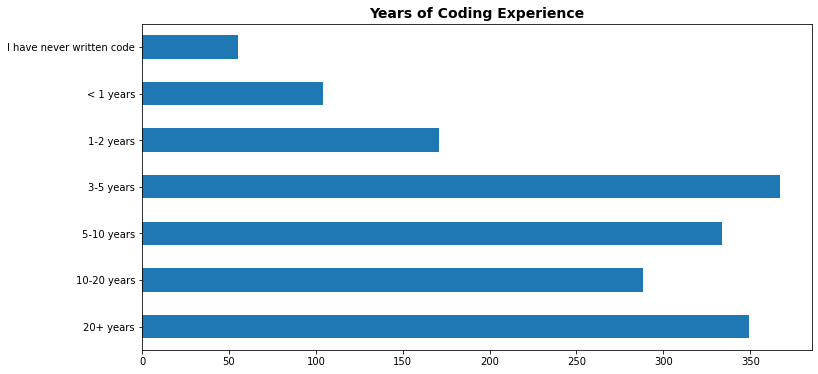

In [13]:
list_and_bar('Q6', q6_order, 'Years of Coding Experience')

Around 80 percent of those responding have 3 or more years experience coding.

### 1. Do you need a formal degree to work in Data Science?

Let's look at formal education, and how it correlates with job titles and coding experience.

                         Count    Pct
Master’s                   819  48.75
Bachelor’s                 409  24.35
PhD                        334  19.88
Some college/university     71   4.23
Professional degree         34   2.02
Prefer not to answer         8   0.48
High school                  5   0.30


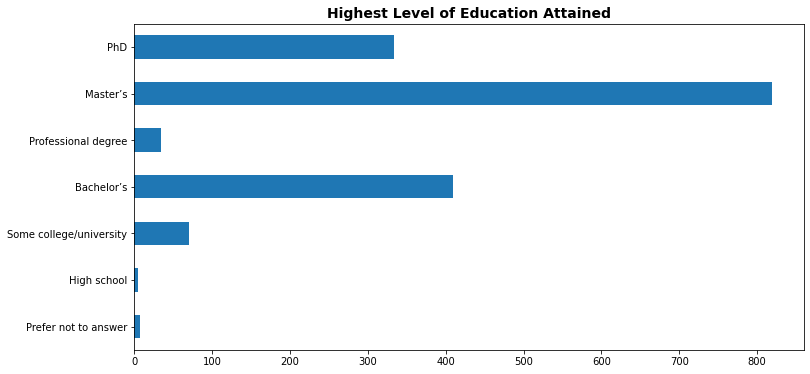

In [14]:
list_and_bar('Q4', q4_order, 'Highest Level of Education Attained')

                           Count    Pct
Data Scientist               389  23.15
Other                        292  17.38
Software Engineer            219  13.04
Data Analyst                 192  11.43
Research Scientist           140   8.33
Product/Project Manager      117   6.96
Business Analyst             107   6.37
Machine Learning Engineer     97   5.77
Data Engineer                 71   4.23
Statistician                  38   2.26
DBA/Database Engineer         18   1.07


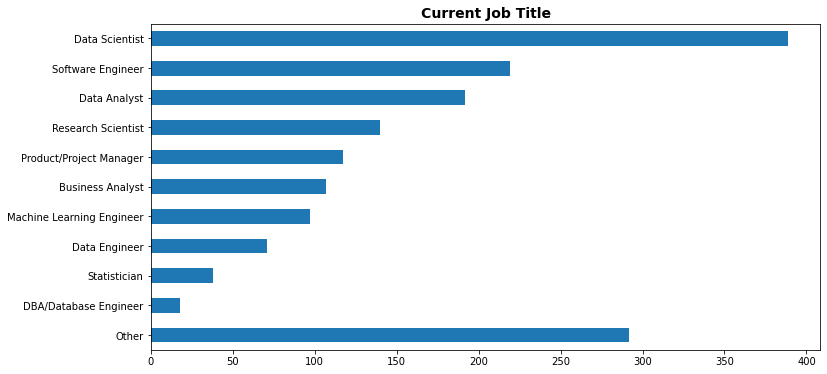

In [15]:
list_and_bar('Q5', q5_order, 'Current Job Title')

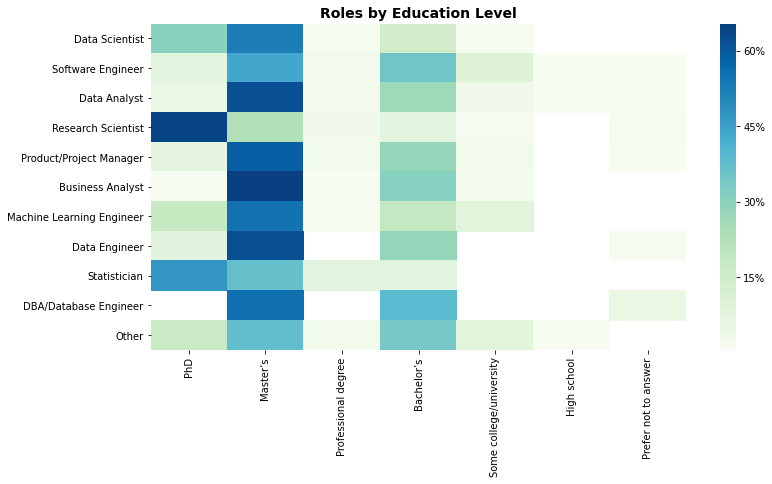

In [16]:
heatmap('Q4', 'Q5', 'Roles by Education Level', q5_order, q4_order)

### Question 1 analysis

With almost 49% of the responses, a Master's degree was by far the most common level of education listed, more than double the next most popular answer. Other notable observations:
    * Sixty-eight percent of US Kagglers hold a Master's Degree or higher. 
    * Research scientists and statisticians are most likely to hold PhDs, followed by Data Scientists.
    * Relatively few survey respondents (around 5%) indicate they do not have at least a Bachelor's degree.
    * Only 23% of those responding hold the title of Data Scientist, but it is nonetheless the title with the highest count. 
        Arguably anyone who is active on Kaggle and who would complete their survey considers themself to be either in, or 
        interested in, the data science field, if not actively working as a Data Scientist. 

### Question 2. What programming language(s) do Data Scientists need to know?

Now we'll turn to programming languages used. As this is a "Select all that apply" question, with each language option appearing as a separate column, we need to do some processing to get the data into a format for easier graphing and analysis.

In [17]:
# creating a dataframe of the language options and the number of times each language was selected
languages = pd.DataFrame()

for col in us_df.columns:
    if(col.startswith('Q7_')):
        language = us_df[col].value_counts()
        languages = languages.append({'Language':language.index[0], 'Count':language[0]}, ignore_index=True)
languages = languages.set_index('Language')
languages = languages.sort_values(by = 'Count', ascending = False)
languages_tot = sum(languages.Count)
languages['Pct'] = round((languages['Count'] * 100 / languages_tot), 2)

             Count    Pct
Language                 
Python      1290.0  29.72
SQL          899.0  20.71
R            549.0  12.65
Bash         304.0   7.00
Other        281.0   6.47
Javascript   265.0   6.11
Java         214.0   4.93
C++          177.0   4.08
MATLAB       138.0   3.18
C            125.0   2.88
Julia         37.0   0.85
None          37.0   0.85
Swift         24.0   0.55


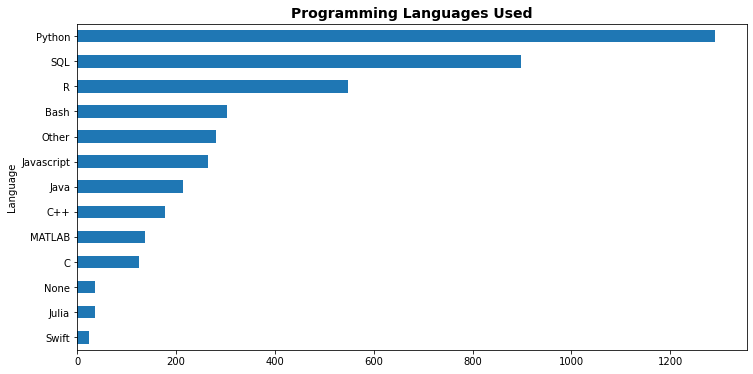

In [18]:
list_and_bar_mc(languages, 'Programming Languages Used')

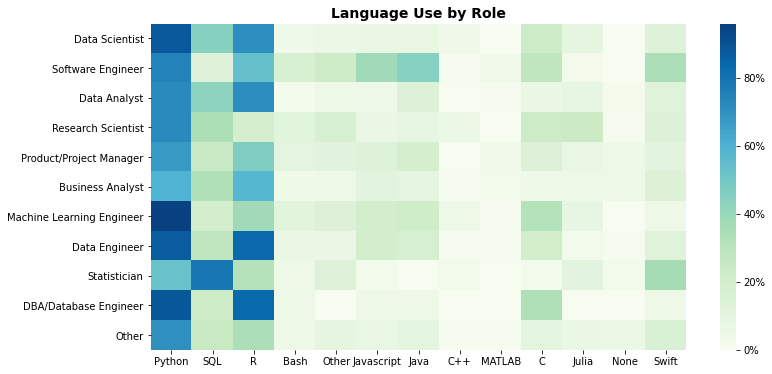

Average number of options chosen by survey respondents: 2.56.


In [19]:
heatmap_mc('Q5', 'Q7', 'Language Use by Role', languages.index, q5_order)

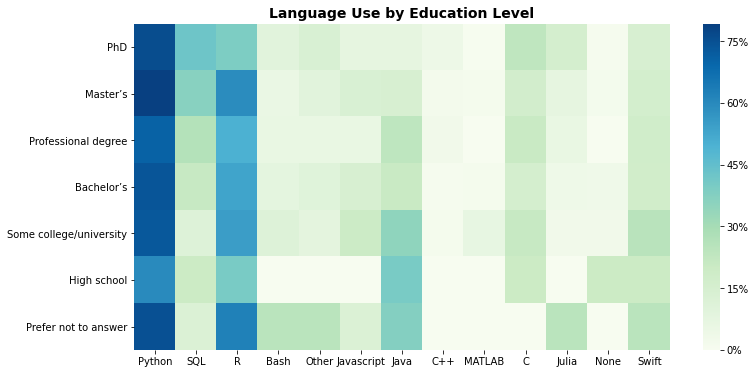

Average number of options chosen by survey respondents: 2.56.


In [20]:
heatmap_mc('Q4', 'Q7','Language Use by Education Level', languages.index, q4_order)

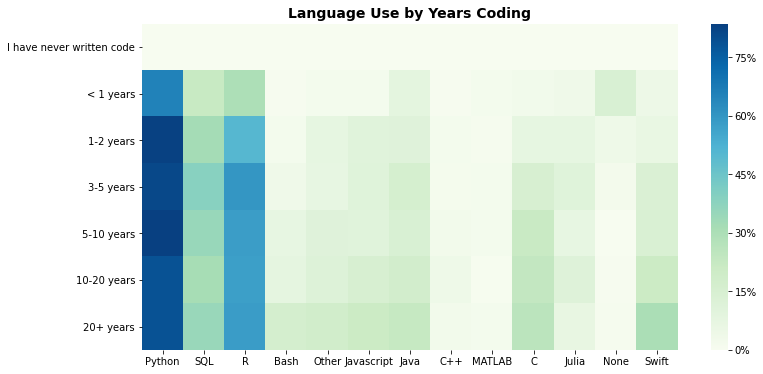

Average number of options chosen by survey respondents: 2.56.


In [21]:
heatmap_mc('Q6', 'Q7', 'Language Use by Years Coding', languages.index, q6_order)

### Question 2 analysis

Python was the most widely used language, followed by SQL and R. Python held the top spot across almost all job roles -- only Statisticians listed another language (SQL) higher -- and for all education levels and coding experience. R enjoys widespread popularity across education level and years coding as well; SQL shows a high number of users overall, but they are more concentrated in people holding Master's or PhD degrees, working as Statisticians, Data Scientists and Data Analysts.

Kagglers reported using 2-3 languages on a regular basis.

### 3. What are the preferred online learning platforms to gain data science knowledge and skills?

Regarding online learning, Kaggle's survey asked, "On which platforms have you begun or completed data science courses? (Select all that apply)." We'll handle the answers similarly to the language data. 

In [22]:
# creating a dataframe of online course providers and the number of times each was selected by users
platforms = pd.DataFrame()

for col in us_df.columns:
    if(col.startswith('Q37_')):
        platform = us_df[col].value_counts()
        platforms = platforms.append({'Platform':platform.index[0], 'Count':platform[0]}, ignore_index=True)
platforms = platforms.set_index('Platform')
platforms = platforms.sort_values(by = 'Count', ascending=False)
platforms_tot = sum(platforms.Count)
platforms['Pct'] = round((platforms['Count'] * 100 / platforms_tot), 2)

                                          Count    Pct
Platform                                              
Coursera                                  774.0  20.78
Kaggle Learn Courses                      433.0  11.63
University Courses resulting in a degree  414.0  11.12
Udemy                                     393.0  10.55
DataCamp                                  367.0   9.85
edX                                       328.0   8.81
Udacity                                   254.0   6.82
LinkedIn Learning                         209.0   5.61
None                                      154.0   4.14
Fast.ai                                   144.0   3.87
Other                                     139.0   3.73
Cloud-certification programs              115.0   3.09


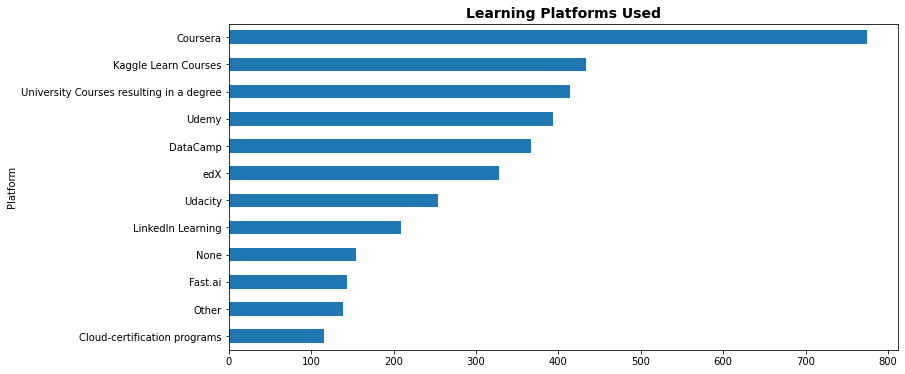

In [23]:
list_and_bar_mc(platforms, 'Learning Platforms Used')

### Question 3 analysis

Coursera was the most popular response, by a good margin. Kaggle Learn, University Courses towards a degree and Udemy followed, with Datacamp and edX not far behind. Kaggle Learn is a relatively new entrant into this area, offering short, narrowly-focused, skill-based courses for free which offer certificates upon completion. These factors may all contribute to the platform's popularity, as it is easy to try out for the cost of a few hours and no money.

### Question 4.  Does online learning platform preference vary with job title and/or education level?

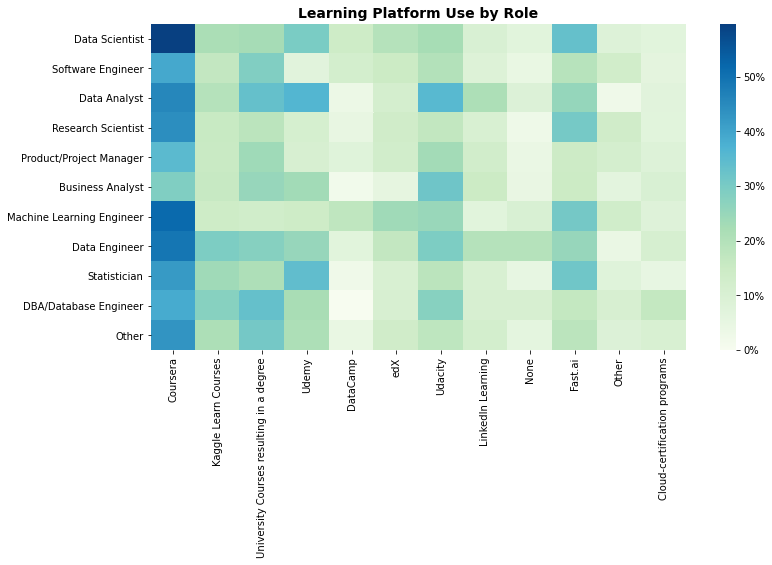

Average number of options chosen by survey respondents: 2.15.


In [24]:
heatmap_mc('Q5', 'Q37', 'Learning Platform Use by Role', platforms.index, q5_order)

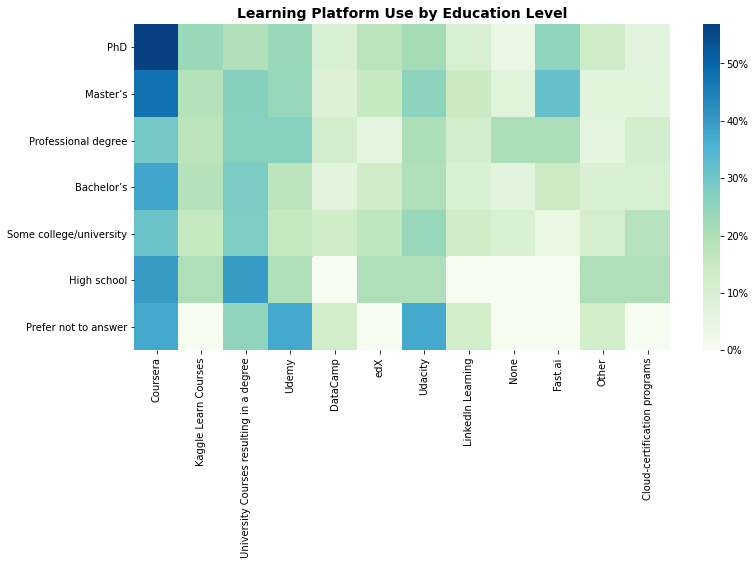

Average number of options chosen by survey respondents: 2.15.


In [25]:
heatmap_mc('Q4', 'Q37', 'Learning Platform Use by Education Level', platforms.index, q4_order)

### Question 4 analysis

Coursera was clearly the most popular platform in almost every category, regardless of education level or job title. Kaggle Learn's usage was fairly uniform across categories. Fast.ai was popular with Research Scientists, Data Scientists, Machine Learnig Engineers, and Statisticians. Other platforms seem to enjoy popularity with some groups more than others, but not in ways that make it easy to extrapolate much.

## Conclusion

The most well-travelled path into the data science field, at least for those responding to the 2020 Kaggle survey:
    * Get at least a Bachelor's degree, though a Master's degree may be preferable
    * Learn at least 2 coding languages -- Python and R are the top data science languages; depending on the role you want,
        you might want to get comfortable with SQL, Java or C.
    * Take classes on online learning platforms to update your skills and learn new ones. 